## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.

# Get the total number of records
total_records = combined_data["Mouse ID"].count()

# Get the total number of unique mice 
unique_mice = combined_data["Mouse ID"].nunique()

# Display values
pd.DataFrame({"Count of all Records" :[total_records], 
              "Count of unique mice" : [unique_mice]})

,Count of all Records,Count of unique mice
0,1893,249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data = combined_data.set_index("Mouse ID")
mouse = combined_data.loc["g989", :]
mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = combined_data.drop("g989")
clean_data = clean_mice_data.reset_index()
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
new_total_records = clean_data["Mouse ID"].count()
new_unique_mice = clean_data["Mouse ID"].nunique()

pd.DataFrame({"Count of all Records(New)" :[new_total_records], 
              "Count of unique mice(New)" : [new_unique_mice]})

,Count of all Records(New),Count of unique mice(New)
0,1880,248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_grouped = clean_data.groupby("Drug Regimen")
Tumor_Vol_Mean = round(drug_grouped["Tumor Volume (mm3)"].mean(),3)
Tumor_Vol_Median = round(drug_grouped["Tumor Volume (mm3)"].median(),3)
Tumor_Vol_Variance = round(drug_grouped["Tumor Volume (mm3)"].var(),3)
Tumor_Vol_StDev = round(drug_grouped["Tumor Volume (mm3)"].std(),3)
Tumor_Vol_SEM = round(drug_grouped["Tumor Volume (mm3)"].sem(),3)

summary_stat_df = pd.DataFrame({"Tumor_Vol_Mean" : Tumor_Vol_Mean,
                                "Tumor_Vol_Median" : Tumor_Vol_Median,
                                "Tumor_Vol_Variance" : Tumor_Vol_Variance,
                                "Tumor_Vol_StDev" : Tumor_Vol_StDev,
                                "Tumor_Vol_SEM" : Tumor_Vol_SEM
                               })
summary_stat_df=summary_stat_df.reset_index()
summary_stat_df

,Drug Regimen,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Variance,Tumor_Vol_StDev,Tumor_Vol_SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.321,50.446,43.852,6.622,0.544
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_agg_grouped = clean_data.groupby("Drug Regimen").agg(
    Tumor_Vol_Mean=("Tumor Volume (mm3)", np.mean),
    Tumor_Vol_Median=("Tumor Volume (mm3)", np.median),
    Tumor_Vol_Variance=("Tumor Volume (mm3)", np.var),
    Tumor_Vol_StDev=("Tumor Volume (mm3)", np.std),
    Tumor_Vol_SEM=("Tumor Volume (mm3)", st.sem)
).round(3)

drug_agg_grouped = drug_agg_grouped.reset_index()
drug_agg_grouped

,Drug Regimen,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Variance,Tumor_Vol_StDev,Tumor_Vol_SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.321,50.446,43.852,6.622,0.544
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


## Bar and Pie Charts

[Text(0, 0, 'Capomulin'),
 Text(1, 0, 'Ceftamin'),
 Text(2, 0, 'Infubinol'),
 Text(3, 0, 'Ketapril'),
 Text(4, 0, 'Naftisol'),
 Text(5, 0, 'Placebo'),
 Text(6, 0, 'Propriva'),
 Text(7, 0, 'Ramicane'),
 Text(8, 0, 'Stelasyn'),
 Text(9, 0, 'Zoniferol')]

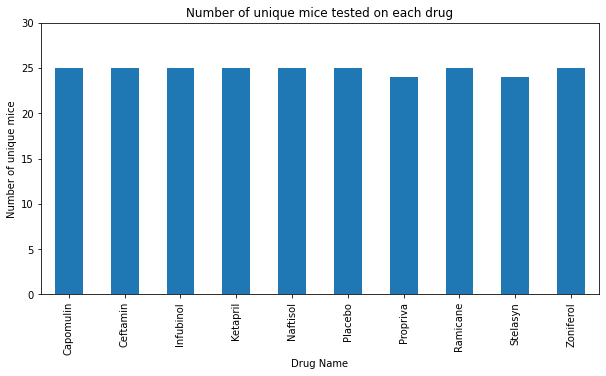

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_mice = clean_data.groupby("Drug Regimen")["Mouse ID"].nunique()
drug_mice = drug_mice.reset_index()
drug_mice_count_plot = drug_mice.plot(kind="bar", figsize=(10,5), title="Number of unique mice tested on each drug",
                                     xlabel = "Drug Name", ylabel = "Number of unique mice", 
                                     ylim = (0, drug_mice["Mouse ID"].max()+5), legend=False)
drug_mice_count_plot.set_xticklabels(drug_mice["Drug Regimen"], rotation=90)

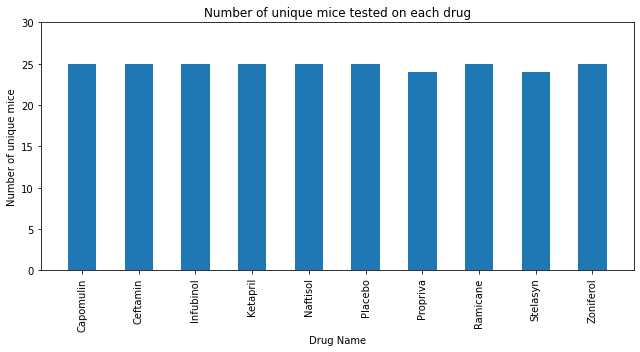

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure(figsize=(9,5))
plt.bar(drug_mice["Drug Regimen"], drug_mice["Mouse ID"], width=0.5)
plt.xticks(drug_mice["Drug Regimen"], rotation=90)
plt.title("Number of unique mice tested on each drug")
plt.xlabel("Drug Name")
plt.ylabel("Number of unique mice")
plt.ylim(0, drug_mice["Mouse ID"].max()+5)
plt.tight_layout()
plt.show()

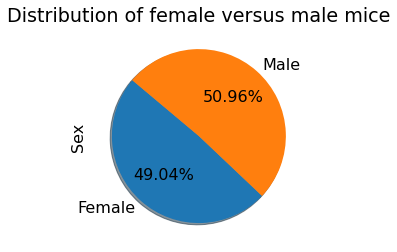

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# First create a groupby object by grouping on the 'Sex' column
gender_stat = clean_data.groupby("Sex")

# Create a dataframe counting the number of data points for each gender
gender_count = pd.DataFrame(gender_stat["Sex"].count())

#Plot the graph
gender_mouse_plot = gender_count.plot(kind="pie", y="Sex", autopct="%1.2f%%", shadow=True, startangle=140, legend=False,
                                     fontsize=16, title="Distribution of female versus male mice")

(-1.1171944866462706,
 1.1057967798535038,
 -1.110919364943666,
 1.107907705791865)

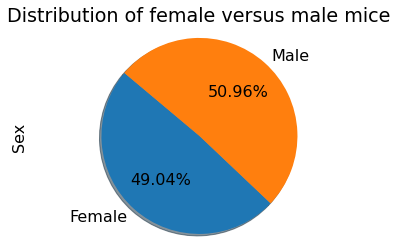

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_count.index.values)
gen_count = gender_stat["Sex"].count()
plt.pie(gen_count, labels = genders, autopct="%1.2f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Get the data for above drugs to another df
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_drug_data = clean_data[clean_data["Drug Regimen"].isin(drug_list)]

# Start by getting the last (greatest) timepoint for each mouse
four_drug_data = four_drug_data.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
four_drug_data = four_drug_data.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
top_drug = pd.merge(four_drug_data, clean_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]],
                    on=["Mouse ID", "Timepoint"], how="left")

# Display data frame created above
top_drug



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = [[] for i in range(len(drug_list))]
for i in range (len(top_drug)):
    drug = top_drug.iloc[i,:]["Drug Regimen"]
    t_vol = round(top_drug.iloc[i,:]["Tumor Volume (mm3)"],3)
    for j in range(len(drug_list)):
        if drug == drug_list[j]:
            tumor_vol[j].append(t_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
counter = 0 # counter is declared to track the first iteration
for drug in drug_list:
    quartiles = top_drug.loc[top_drug["Drug Regimen"]== drug,"Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    if counter == 0:
        print("-----------------------------------------------------------")
    print(f"The lower quartile of {drug} tumor volume is: {lowerq}")
    print(f"The upper quartile of {drug} tumor volume is: {upperq}")
    print(f"The interquartuile range of {drug} tumor volume is: {iqr}")
    print(f"The median of {drug} tumor volume is: {quartiles[0.5]}")
    print(f"Values below {lower_bound} could be outliers for {drug} tumor volume")
    print(f"Values above {upper_bound} could be outliers for {drug} tumor volume")
    print("-----------------------------------------------------------")
    counter +=1

-----------------------------------------------------------
The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartuile range of Capomulin tumor volume is: 7.781863460000004
The median of Capomulin tumor volume is: 38.125164399999996
Values below 20.70456164999999 could be outliers for Capomulin tumor volume
Values above 51.83201549 could be outliers for Capomulin tumor volume
-----------------------------------------------------------
The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartuile range of Ramicane tumor volume is: 9.098536719999998
The median of Ramicane tumor volume is: 36.56165229
Values below 17.912664470000003 could be outliers for Ramicane tumor volume
Values above 54.30681135 could be outliers for Ramicane tumor volume
-----------------------------------------------------------
The lower quartile of Infubinol

[]

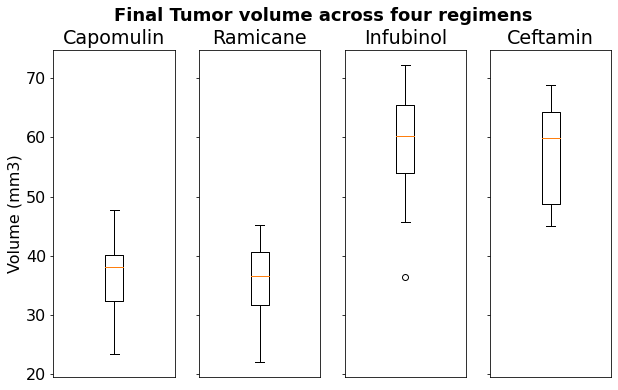

In [95]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,(ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True, figsize=(10,6))
fig1.suptitle('Final Tumor volume across four regimens', fontsize=18, fontweight='bold')

ax1.set_ylabel('Volume (mm3)')
ax1.set_title(drug_list[0])
ax1.boxplot(tumor_vol[0])
ax1.set_xticks([])

ax2.set_title(drug_list[1])
ax2.boxplot(tumor_vol[1])
ax2.set_xticks([])

ax3.set_title(drug_list[2])
ax3.boxplot(tumor_vol[2])
ax3.set_xticks([])

ax4.set_title(drug_list[3])
ax4.boxplot(tumor_vol[3])
ax4.set_xticks([])

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
